In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_weather = pd.read_csv("data/direct_weather.csv")
print("Weather data is successfully loaded into a dataframe")
print("Weather data loaded:", df_weather.shape)

print("Weather Data (first 5 rows):")
print(df_weather.head())

Weather data is successfully loaded into a dataframe
Weather data loaded: (169515, 11)
Weather Data (first 5 rows):
   city_name        date  temperature_max  temperature_min  precipitation_sum  \
0  Amsterdam  2013-01-01              9.2              5.5               10.2   
1  Amsterdam  2013-01-02              7.8              5.6                0.5   
2  Amsterdam  2013-01-03             10.3              8.2                2.0   
3  Amsterdam  2013-01-04              9.5              8.1                0.0   
4  Amsterdam  2013-01-05              8.6              7.0                0.0   

   rain_sum  snowfall_sum  precipitation_hours  wind_speed_max  \
0      10.2           0.0                 14.0            32.0   
1       0.5           0.0                  2.0            22.9   
2       2.0           0.0                  6.0            22.2   
3       0.0           0.0                  0.0            19.8   
4       0.0           0.0                  0.0            16.0   



In [23]:
# Deduplication
df_weather = df_weather.drop_duplicates(subset=["city_name", "date"])

# Check for missing critical fields
missing_weather = df_weather[["city_name", "date"]].isna().sum()

print("Missing values in Weather dataset:\n", missing_weather)

Missing values in Weather dataset:
 city_name    0
date         0
dtype: int64


In [24]:
# Fill missing dates per city
def complete_city_dates(df):
    all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max())
    cities = df['city_name'].unique()
    df_full = []
    
    for city in cities:
        city_df = df[df['city_name'] == city].set_index('date').reindex(all_dates).reset_index()
        city_df.rename(columns={'index':'date'}, inplace=True)
        city_df['city_name'] = city
        df_full.append(city_df)
    
    return pd.concat(df_full, ignore_index=True)



In [30]:
# Ensure date column is in datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Fill missing dates for each city
old_shape = df_weather.shape[0]

df_weather = complete_city_dates(df_weather)

print("Missing dates filled per city successfully!")
print("Original rows:", old_shape)
print("New rows:", df_weather.shape[0])
print("Rows added:", df_weather.shape[0] - old_shape)



Missing dates filled per city successfully!
Original rows: 169515
New rows: 169515
Rows added: 0


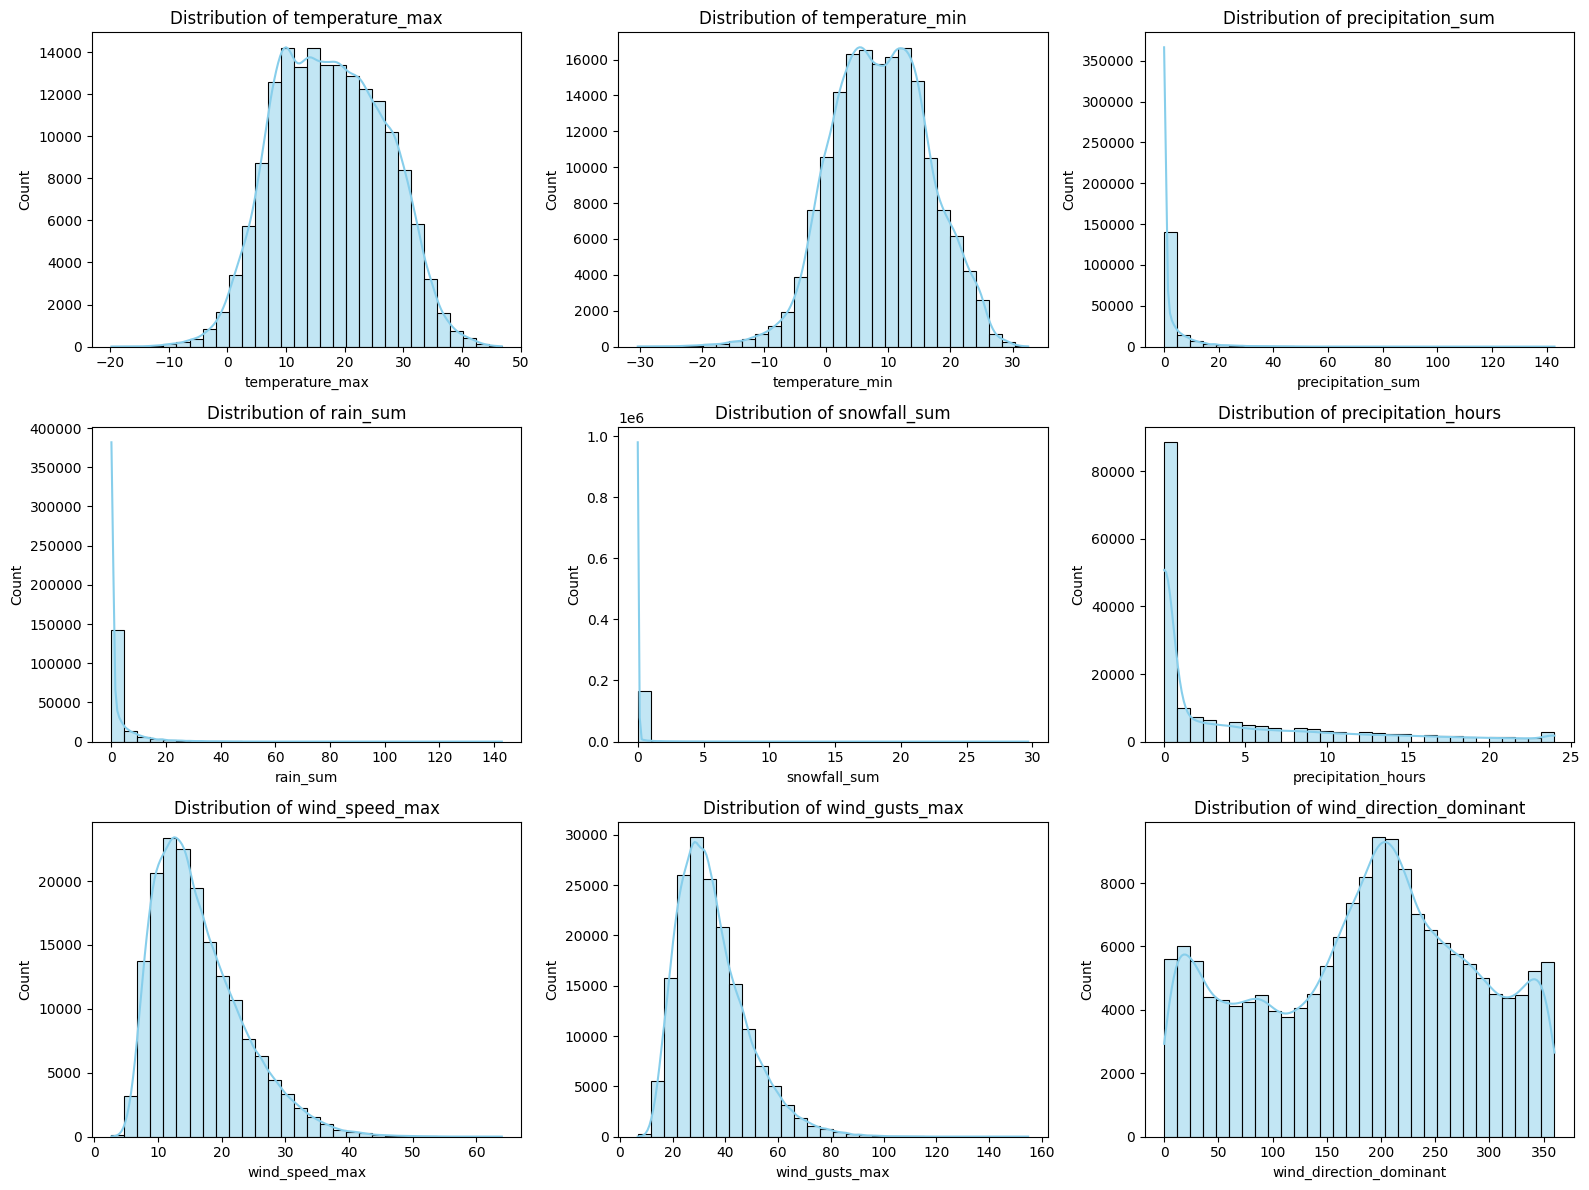

In [9]:
# Histograms
numeric_cols = ['temperature_max', 'temperature_min', 'precipitation_sum', 
                'rain_sum', 'snowfall_sum', 'precipitation_hours', 
                'wind_speed_max', 'wind_gusts_max', 'wind_direction_dominant']

plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_weather[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

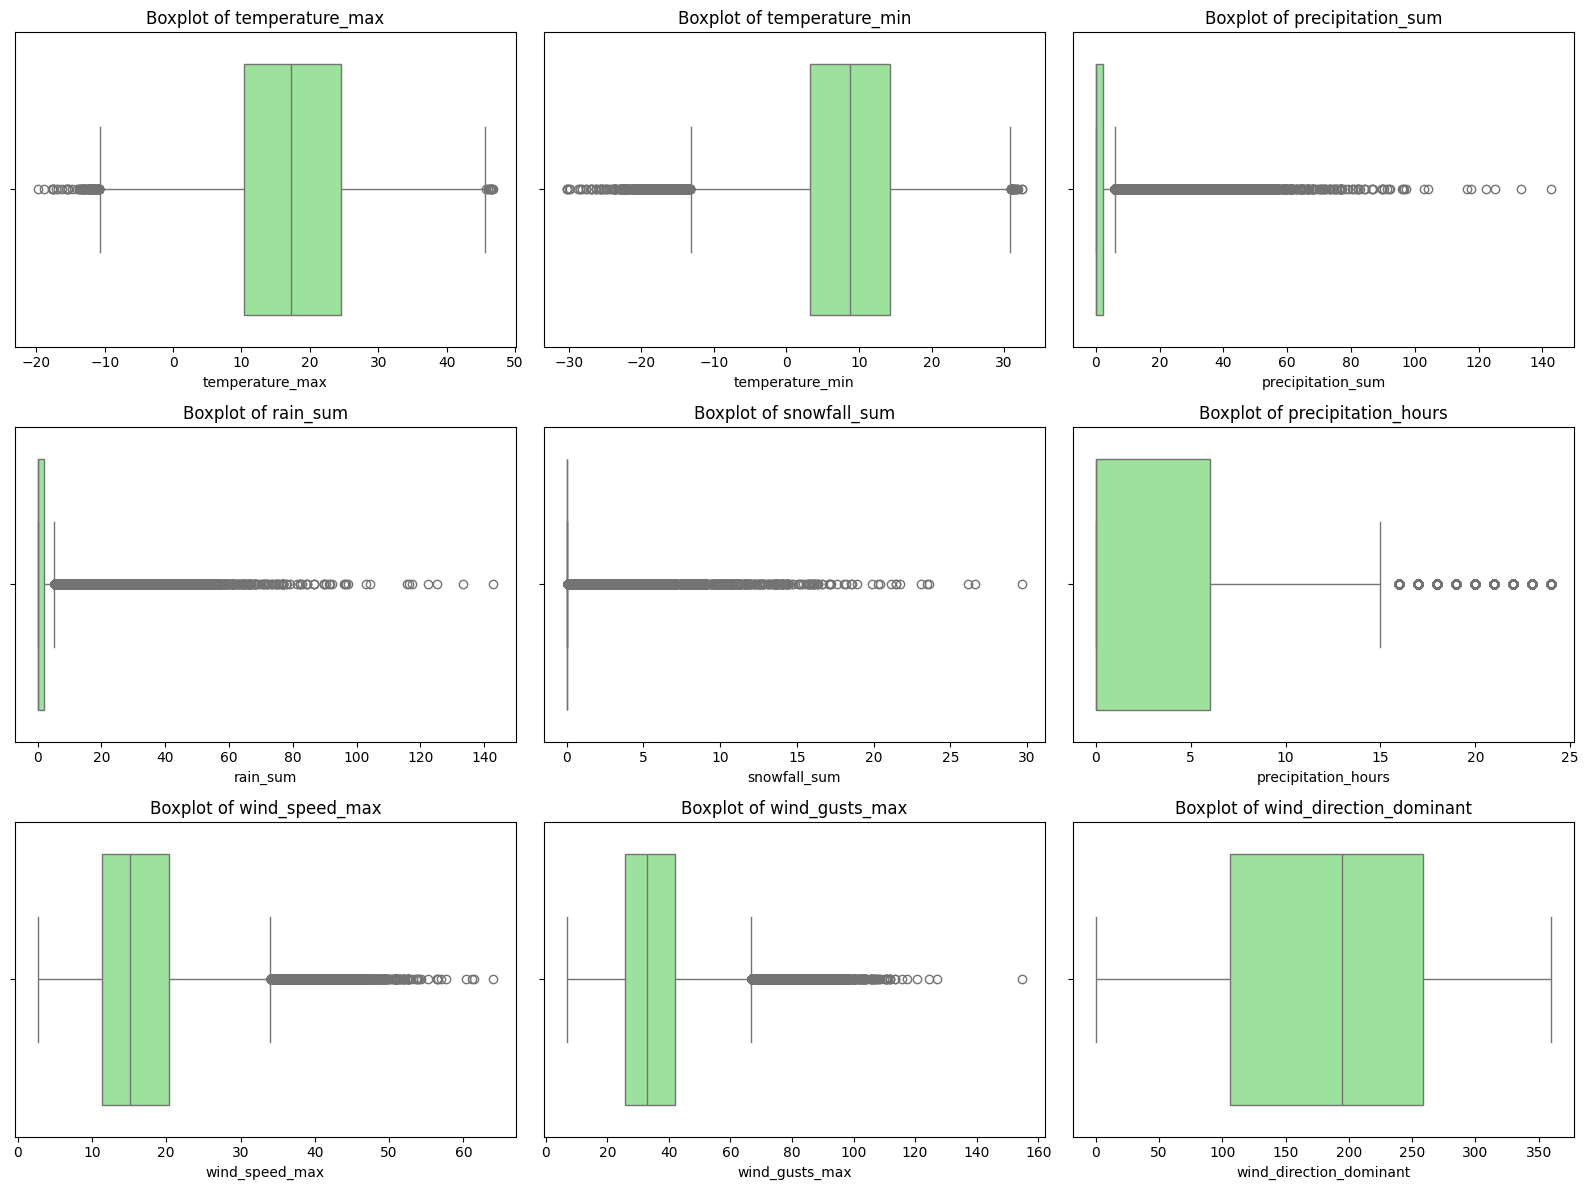

In [10]:
# Boxplots for Outlier Detection
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_weather[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

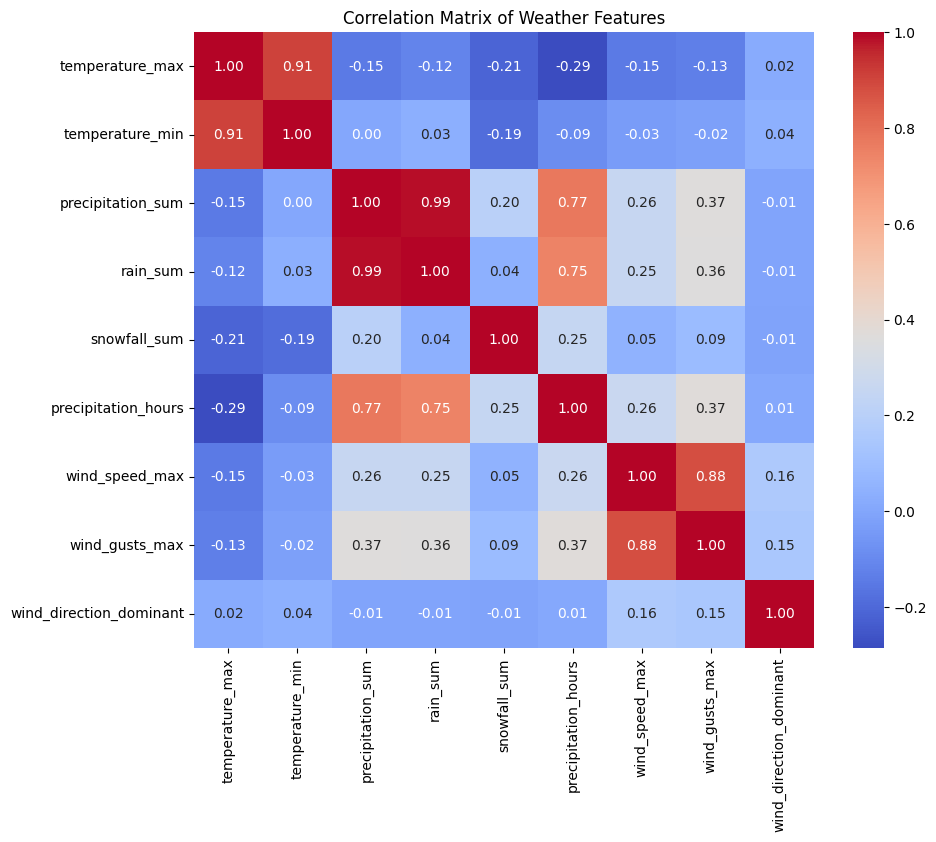

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_weather[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Features")
plt.show()

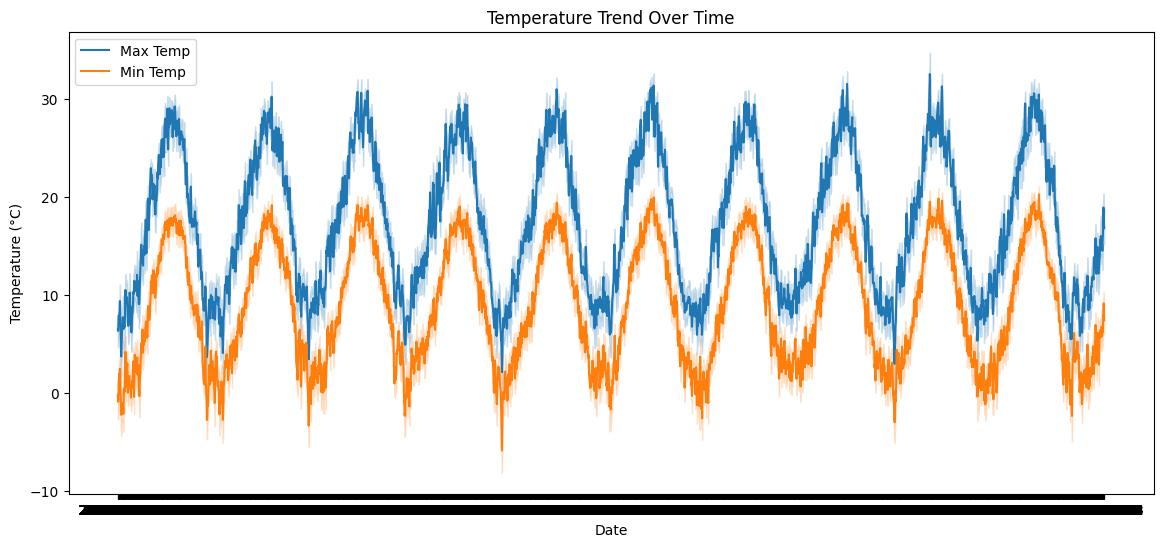

In [13]:
# Time Series Plots (Average Temp Over Time)
plt.figure(figsize=(14,6))
sns.lineplot(data=df_weather, x='date', y='temperature_max', label='Max Temp')
sns.lineplot(data=df_weather, x='date', y='temperature_min', label='Min Temp')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [12]:
print(df_weather[numeric_cols].describe())

       temperature_max  temperature_min  precipitation_sum       rain_sum  \
count    169515.000000    169515.000000      169515.000000  169515.000000   
mean         17.524697         8.827497           2.677512       2.545623   
std           9.204999         7.744880           6.168811       6.045667   
min         -19.800000       -30.300000           0.000000       0.000000   
25%          10.400000         3.300000           0.000000       0.000000   
50%          17.300000         8.800000           0.000000       0.000000   
75%          24.500000        14.300000           2.400000       2.100000   
max          46.800000        32.500000         142.800000     142.800000   

        snowfall_sum  precipitation_hours  wind_speed_max  wind_gusts_max  \
count  169515.000000        169515.000000   169515.000000    169515.00000   
mean        0.097081             4.134549       16.487308        35.06080   
std         0.716814             6.333845        6.934906        13.23002  

<Axes: >

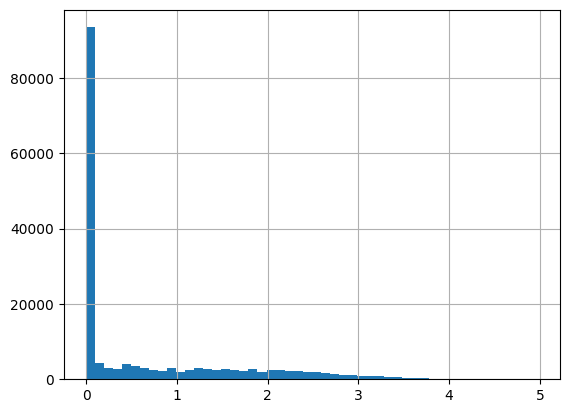

In [31]:
import numpy as np

# List of highly skewed features
skewed_features = [
    'precipitation_sum', 'rain_sum', 'snowfall_sum', 
    'precipitation_hours', 'wind_speed_max', 'wind_gusts_max'
]

# Apply log(1 + x) transformation to the skewed columns
for col in skewed_features:
    # Creates a new column named 'log_...'
    df_weather[f'log_{col}'] = np.log1p(df_weather[col])
    
# Check the distribution of a transformed feature
df_weather['log_precipitation_sum'].hist(bins=50)

Generating Distribution Plots (Histograms)...


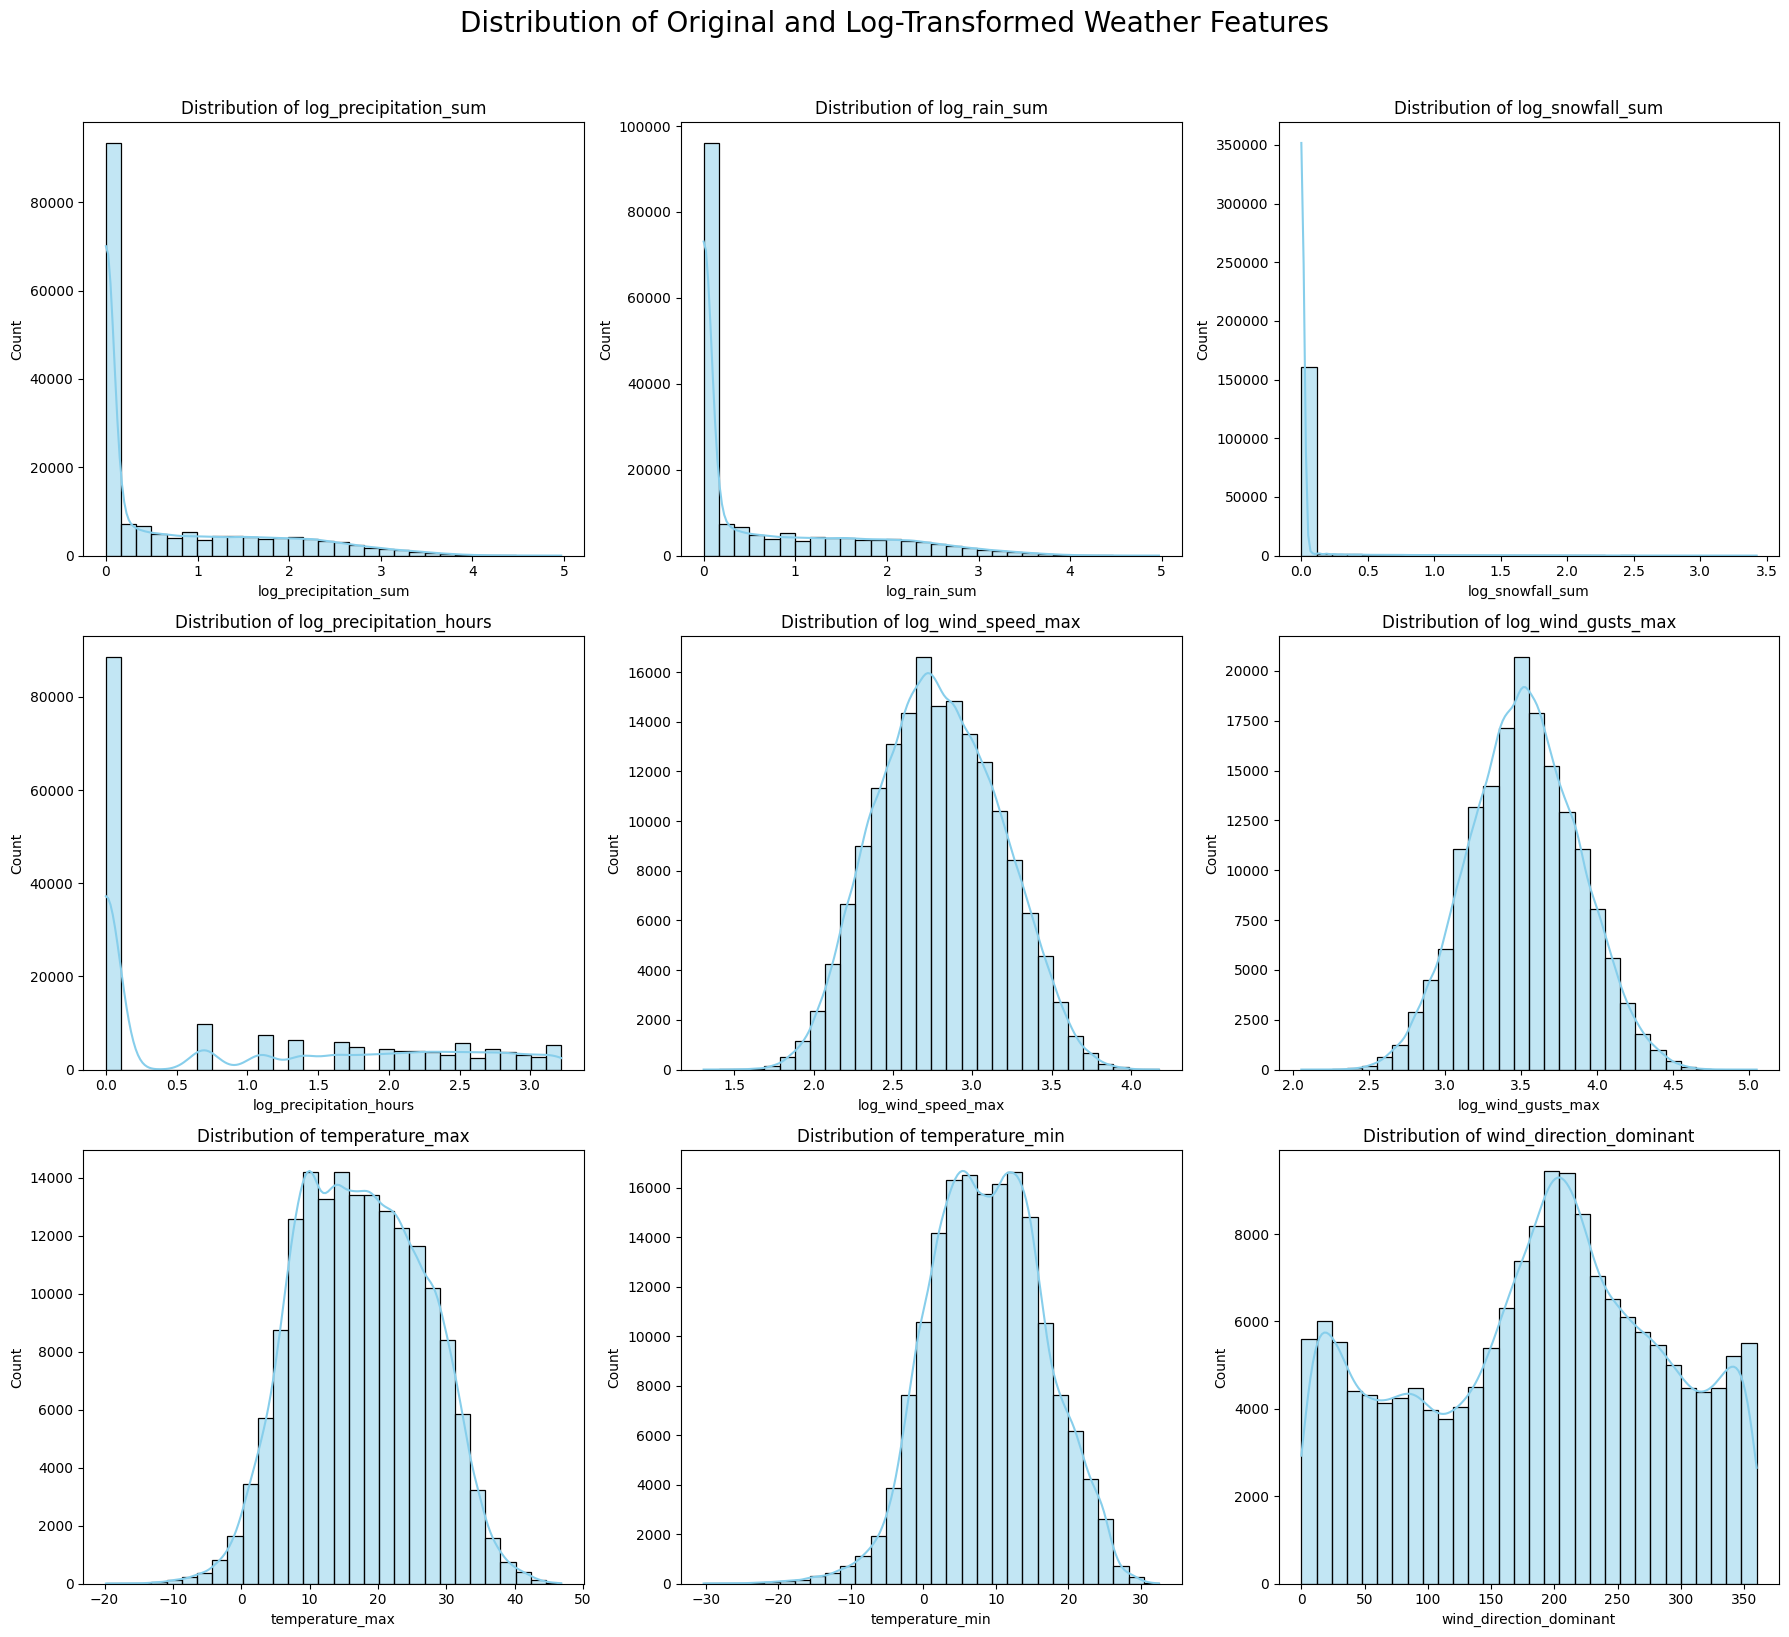

In [19]:
# List of the original features that were transformed
original_skewed_features = [
    'precipitation_sum', 'rain_sum', 'snowfall_sum', 
    'precipitation_hours', 'wind_speed_max', 'wind_gusts_max'
]

# List of the new, transformed features
transformed_features = [f'log_{col}' for col in original_skewed_features]

all_features_to_plot = transformed_features + ['temperature_max', 'temperature_min', 'wind_direction_dominant']


# Histograms (Distribution Plots)
print("Generating Distribution Plots (Histograms)...")
# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Distribution of Original and Log-Transformed Weather Features', fontsize=20, y=1.02)
axes = axes.flatten() # Flatten the 3x3 grid for easier iteration

# plot the first 9 features for a clean 3x3 grid
for i, col in enumerate(all_features_to_plot):
    if i < 9:
        sns.histplot(df_weather[col], kde=True, ax=axes[i], color='skyblue', bins=30)
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

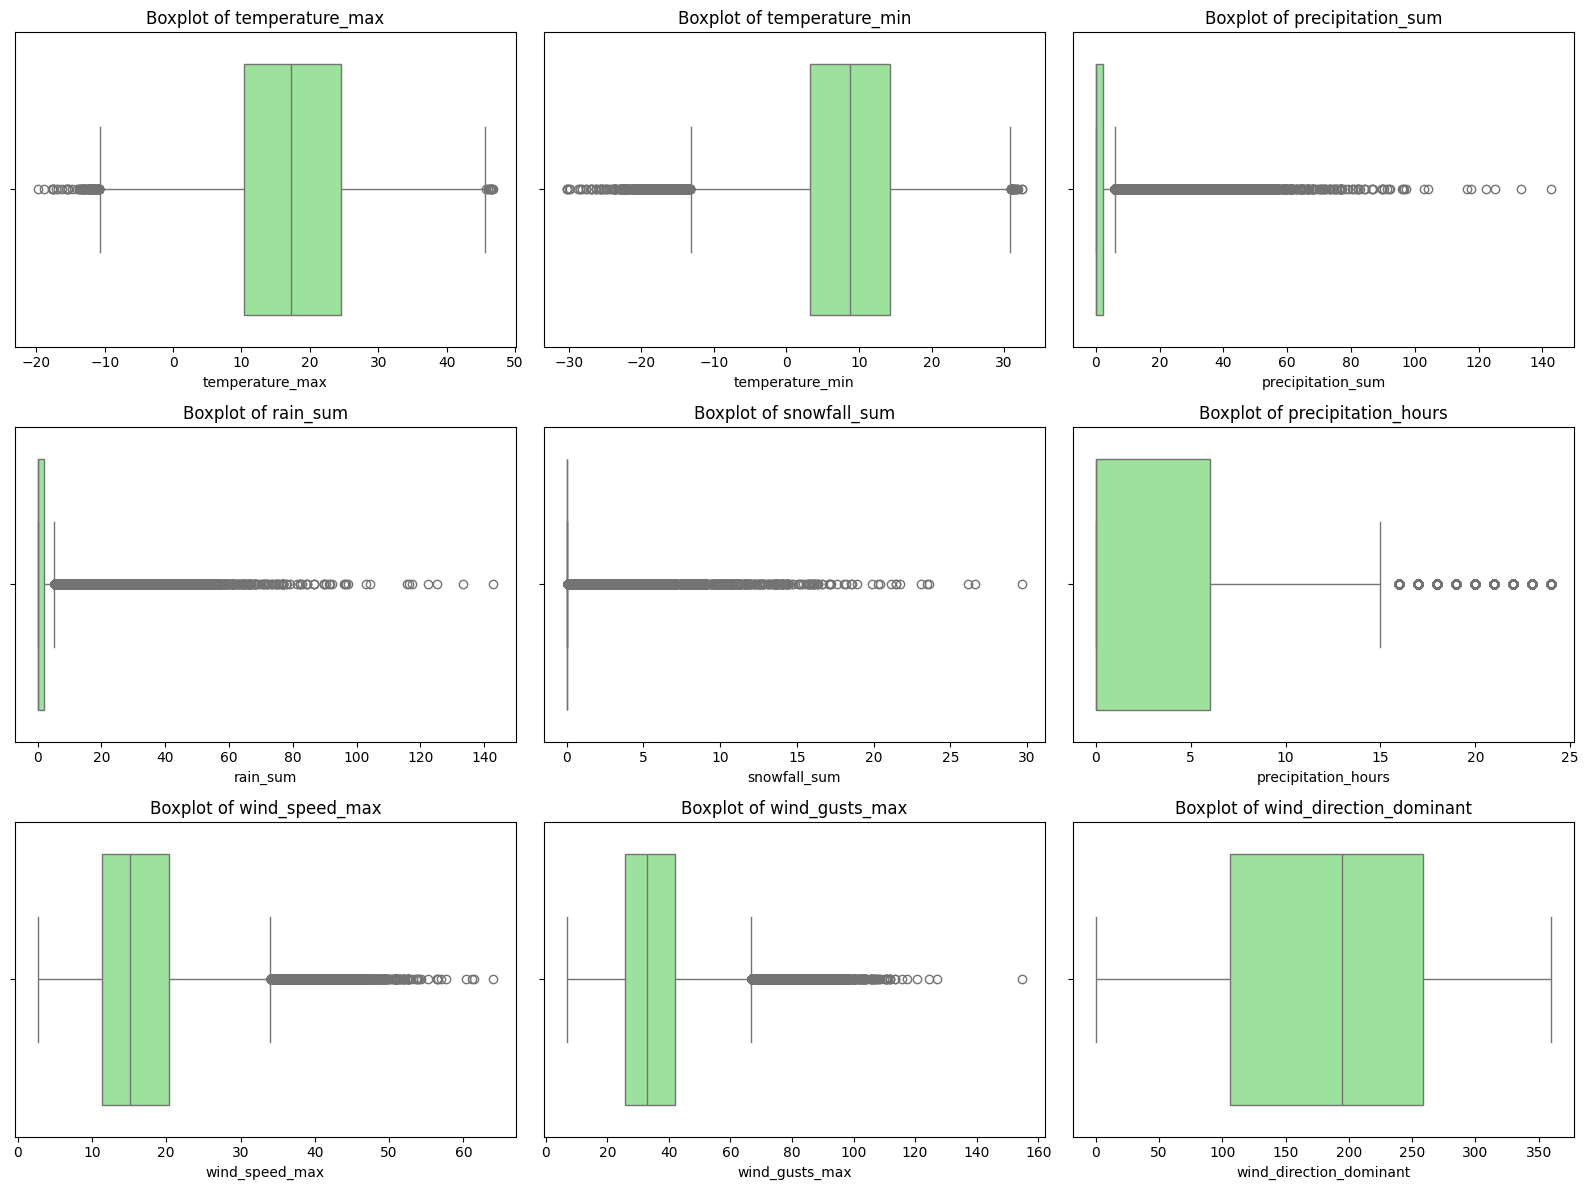

In [20]:
# Boxplots for Outlier Detection
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_weather[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

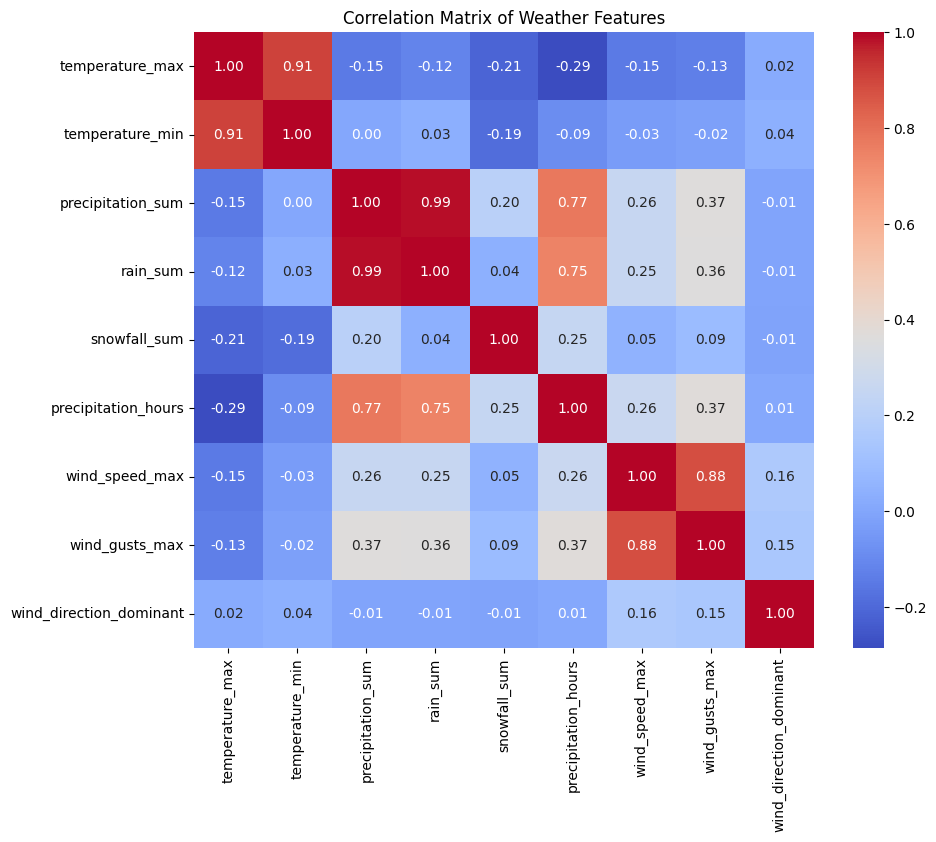

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_weather[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Features")
plt.show()

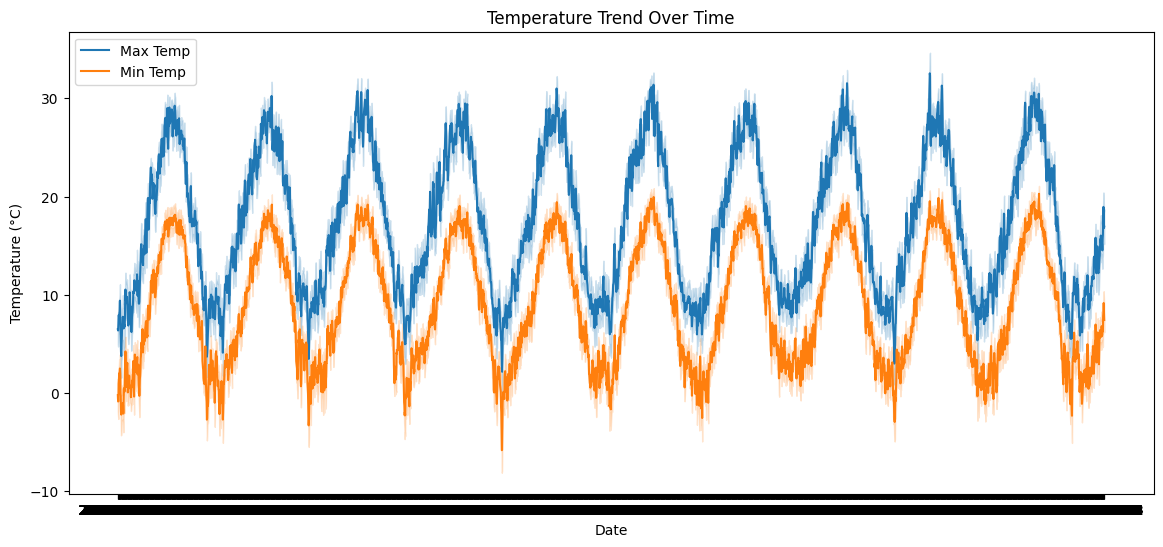

In [22]:
# Time Series Plots (Average Temp Over Time)
plt.figure(figsize=(14,6))
sns.lineplot(data=df_weather, x='date', y='temperature_max', label='Max Temp')
sns.lineplot(data=df_weather, x='date', y='temperature_min', label='Min Temp')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [26]:
import os 

# Define the output file path and name
output_file_name = "data/final_weather_data.csv"

# Save the DataFrame
df_weather.to_csv(output_file_name, index=False)

# Confirmation message
print(f"DataFrame successfully saved to: {os.path.abspath(output_file_name)}")
print(f"The saved DataFrame has {df_weather.shape[0]} rows and {df_weather.shape[1]} columns.")

DataFrame successfully saved to: D:\Air-Quality\data\final_weather_data.csv
The saved DataFrame has 169515 rows and 17 columns.
